Experimenting with the Umm Waqqas Tweets 
======

- Tweets provided by Mia Bloom
- Code by Shawn L. Ramirez
- October 2017

In [16]:
! pip install --pre python-docx
! pip3 install --user lxml

In [98]:
import sys
sys.path.append("/Users/shawnramirez/.local/lib/python3.6/site-packages")
print(sys.path)

['', '/Users/shawnramirez/anaconda/lib/python36.zip', '/Users/shawnramirez/anaconda/lib/python3.6', '/Users/shawnramirez/anaconda/lib/python3.6/lib-dynload', '/Users/shawnramirez/.local/lib/python3.6/site-packages', '/Users/shawnramirez/anaconda/lib/python3.6/site-packages', '/Users/shawnramirez/anaconda/lib/python3.6/site-packages/Sphinx-1.5.6-py3.6.egg', '/Users/shawnramirez/anaconda/lib/python3.6/site-packages/aeosa', '/Users/shawnramirez/anaconda/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg', '/Users/shawnramirez/anaconda/lib/python3.6/site-packages/IPython/extensions', '/Users/shawnramirez/.ipython', '/Users/shawnramirez/.local/lib/python3.6/site-packages', '/Users/shawnramirez/.local/lib/python3.6/site-packages', '/Users/shawnramirez/.local/lib/python3.6/site-packages']


In [99]:
import numpy as np
import pandas as pd

In [100]:
from docx import Document

In [101]:
document = Document('UmmWaqqasTweets.docx')

In [102]:
for para in document.paragraphs:
    print(para.text)

_UmmWaqqas	The test in our struggles is our ability to stay patient in times of hardships. Allah says in the Quran "Allah Loves those who are PATIENT"Nothing is impossible for Allah, & if something is meant for you it will happen. Regardless of how it does it eventually willIn life we face so many hardships & think there's no way out of them yet forget that Allah is Wali Al-Hamid. He will make a way out for youAllah says "I will make a way for you from sources you could not imagine"When you think your back is against the wall, & you feel like there is no way out for you PLACE your trust in Allah & watch things go smooth3. Alhamdulilah she made it to Ash-Shaam.  She is a sister whom I love dearly & admire, now the lesson in all of this is...2. She placed her trust in Allah & tied her camel & set out to make Hijrah. Though the path was tough & though there were obstacles2. One BIG PROBELM she was under watch by the government & was being tracked by her every move.1. Bismillah.... 

There

"There can be no Islam in the person who does not perform salah." Umar Ibn Khattab"When one‚Äôs intention is sincere, Allah will suffice his needs, protect him, and guide him in his dealings."-Umar Ibn KhattabUmar replied, ‚Äúwe are people who have been given respect because of Islam & therefore do not wish any substitute.‚ÄùIf you ride a Turkish horse and wear some other clothing, it would command more respect in the eyes of the Romans.1. When Palestine was conquered, a priest said to Umar, ‚Äúu are the leader of the Muslims, it is not befitting that u ride a camel in here.ŸÑŸéŸÖŸéŸëÿß ŸÇŸéÿ∂ŸéŸâ ÿßŸÑŸÑŸéŸëŸáŸè ÿßŸÑŸíÿÆŸéŸÑŸíŸÇŸé ŸÉŸéÿ™Ÿéÿ®Ÿé ŸÅŸêŸä ŸÉŸêÿ™Ÿéÿßÿ®ŸêŸáŸê ŸÅŸéŸáŸèŸàŸé ÿπŸêŸÜŸíÿØŸéŸáŸè ŸÅŸéŸàŸíŸÇŸé ÿßŸÑŸíÿπŸéÿ±Ÿíÿ¥Ÿê ÿ•ŸêŸÜŸéŸë ÿ±Ÿéÿ≠ŸíŸÖŸéÿ™ŸêŸä ÿ∫ŸéŸÑŸéÿ®Ÿéÿ™Ÿí ÿ∫Ÿéÿ∂Ÿéÿ®ŸêŸäThere are those who simply read the Quran, & then there are those who live it.Another one who i make dua gets Hidayaah is Dr. Mads Gilbert SubhanAllah, May Allah bless him with Islam & Jannah@Muawiya

In [145]:
print(document.paragraphs[4].text)

 (Tirmidhi)Lool at those articles. The crap journalists say nowadays is mad funny, & people belive it SMHLol I would post the article talking about Umm Layth but I can't because she's a Niqabi & her face is shown...Female recruiter ya know @FlamessOfwar  


In [146]:
len(document.paragraphs)

1885

In [147]:
df = pd.Series(np.random.randn(len(document.paragraphs))) 

In [148]:
df.shape

(1885,)

In [149]:
df[1:5]

1    3.064194
2   -0.768679
3   -0.219993
4    1.270809
dtype: float64

In [150]:
for x in df.index: 
    df[x] = document.paragraphs[x].text

In [151]:
dfOrig = df
df[1:5]
#these data are in the format we want to tokenize it

1                                                     
2    There was a sister who wanted to make Hijrah &...
3                                                     
4     (Tirmidhi)Lool at those articles. The crap jo...
dtype: object

# sentiment over time
- Is there variation in sentiment over time?

In [117]:
import nltk

In [152]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/shawnramirez/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [153]:
from nltk.corpus import opinion_lexicon

In [154]:
opinion_lexicon.positive()

['a+', 'abound', 'abounds', 'abundance', 'abundant', ...]

In [155]:
opinion_lexicon.negative()
#Mia: maybe we want to add words to this? Or use a different classifation scheme.

['2-faced', '2-faces', 'abnormal', 'abolish', ...]

In [156]:
#break each tweet into tokens:
from nltk.tokenize import TweetTokenizer

In [157]:
tokenizer = TweetTokenizer()

In [158]:
#one option for tokenization, looks okay. Another option is to break this up only by whitespace
#Note that Surah An'am Aqay probably is a name? It doesn't catch this. 
# tweet tokenization
print(df[0])
print(tokenizer.tokenize(df[0]))

_UmmWaqqas	The test in our struggles is our ability to stay patient in times of hardships. Allah says in the Quran "Allah Loves those who are PATIENT"Nothing is impossible for Allah, & if something is meant for you it will happen. Regardless of how it does it eventually willIn life we face so many hardships & think there's no way out of them yet forget that Allah is Wali Al-Hamid. He will make a way out for youAllah says "I will make a way for you from sources you could not imagine"When you think your back is against the wall, & you feel like there is no way out for you PLACE your trust in Allah & watch things go smooth3. Alhamdulilah she made it to Ash-Shaam.  She is a sister whom I love dearly & admire, now the lesson in all of this is...2. She placed her trust in Allah & tied her camel & set out to make Hijrah. Though the path was tough & though there were obstacles2. One BIG PROBELM she was under watch by the government & was being tracked by her every move.1. Bismillah.... 
['_Umm

In [159]:
#let's count the words against a set
def count_words_sets(text,lex_list):
    assert(type(lex_list) == list)
    tokens = set([token.lower() for token in tokenizer.tokenize(text)])
    return [len(tokens.intersection(lex)) for lex in lex_list]

In [160]:
neg_set = set(opinion_lexicon.negative())

In [161]:
pos_set = set(opinion_lexicon.positive())

In [313]:
#test it
count_words_sets(df[2],[neg_set])

[2]

In [163]:
count_words_sets(df[2],[pos_set])

[1]

In [164]:
#run the counter against the entire dataset and add that to the data frame
counts = [count_words_sets(df[text],[pos_set,neg_set]) for text in df.index]

In [180]:
#these next steps create the format for analysis
dfa = pd.DataFrame(df, columns = ['tweet'])
dfa.head()

tweet
0  _UmmWaqqas\tThe test in our struggles is our a...
1                                                   
2  There was a sister who wanted to make Hijrah &...
3                                                   
4   (Tirmidhi)Lool at those articles. The crap jo...

In [181]:
dfa = dfa.assign(pos_words = [count[0] for count in counts])
dfa = dfa.assign(neg_words = [count[1] for count in counts])
dfa.head()

tweet  pos_words  neg_words
0  _UmmWaqqas\tThe test in our struggles is our a...          8          3
1                                                             0          0
2  There was a sister who wanted to make Hijrah &...          1          2
3                                                             0          0
4   (Tirmidhi)Lool at those articles. The crap jo...          0          3

In [182]:
#classify the tweets as either positive, negative, or neutral 
preds = pd.Series(['neutral'] * len(dfa))
preds[dfa['pos_words']>dfa['neg_words']] = 'positive'
preds[dfa['pos_words']<dfa['neg_words']] = 'negative'
dfa = dfa.assign(prediction = preds)
dfa.head()

tweet  pos_words  neg_words  \
0  _UmmWaqqas\tThe test in our struggles is our a...          8          3   
1                                                             0          0   
2  There was a sister who wanted to make Hijrah &...          1          2   
3                                                             0          0   
4   (Tirmidhi)Lool at those articles. The crap jo...          0          3   

  prediction  
0   positive  
1    neutral  
2   negative  
3    neutral  
4   negative

In [184]:
#total number of tokens per tweet
num_toks = [len(tokenizer.tokenize(tweet)) for tweet in dfa['tweet']]
print(num_toks[:5])

[215, 0, 144, 0, 49]


In [185]:
dfa = dfa.assign(num_toks=num_toks)
dfa.head()

tweet  pos_words  neg_words  \
0  _UmmWaqqas\tThe test in our struggles is our a...          8          3   
1                                                             0          0   
2  There was a sister who wanted to make Hijrah &...          1          2   
3                                                             0          0   
4   (Tirmidhi)Lool at those articles. The crap jo...          0          3   

  prediction  num_toks  
0   positive       215  
1    neutral         0  
2   negative       144  
3    neutral         0  
4   negative        49

In [195]:
#this removes blank lines in the data frame
filter = dfa['tweet'] != ''
dfNew = dfa[filter]
dfNew.head()

tweet  pos_words  neg_words  \
0  _UmmWaqqas\tThe test in our struggles is our a...          8          3   
2  There was a sister who wanted to make Hijrah &...          1          2   
4   (Tirmidhi)Lool at those articles. The crap jo...          0          3   
6                             http://t.co/PPqSvThW9I          0          0   
8  I love reading articlesPretty much that articl...          2          0   

  prediction  num_toks  
0   positive       215  
2   negative       144  
4   negative        49  
6    neutral         1  
8   positive        48

In [196]:
print(sum(dfNew.prediction=='positive'),
sum(dfNew.prediction=='negative'),
sum(dfNew.prediction=='neutral')) 
#if we had labels for these data on whether the tweet was 
#genuinely positive, negative, or neutral, we could think about how well the tokenization
#did at predicting those labels

368 221 478


In [199]:
N=len(dfNew.index)
print(N)

1067


In [209]:
time = dfNew.index/2

In [210]:
dfNew = dfNew.assign(time=time)
dfNew.head()

tweet  pos_words  neg_words  \
0  _UmmWaqqas\tThe test in our struggles is our a...          8          3   
2  There was a sister who wanted to make Hijrah &...          1          2   
4   (Tirmidhi)Lool at those articles. The crap jo...          0          3   
6                             http://t.co/PPqSvThW9I          0          0   
8  I love reading articlesPretty much that articl...          2          0   

  prediction  num_toks  time  
0   positive       215   0.0  
2   negative       144   1.0  
4   negative        49   2.0  
6    neutral         1   3.0  
8   positive        48   4.0

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

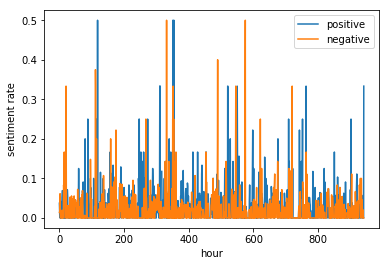

In [213]:
plt.plot(dfNew['time'],dfNew['pos_words']/dfNew['num_toks']);
plt.plot(dfNew['time'],dfNew['neg_words']/dfNew['num_toks']);
plt.xlabel('hour')
plt.ylabel('sentiment rate')
plt.legend(['positive','negative']);

In [214]:
#a little noisy, so maybe we should aggregate it?
import math

In [217]:
dfNew['time10a'] = round(dfNew['time']/10, 0)
dfNew[1:10]

tweet  pos_words  neg_words  \
2   There was a sister who wanted to make Hijrah &...          1          2   
4    (Tirmidhi)Lool at those articles. The crap jo...          0          3   
6                              http://t.co/PPqSvThW9I          0          0   
8   I love reading articlesPretty much that articl...          2          0   
10                  1. Anyone with Umm in their names          0          0   
12  Whoops"@Umm_Kulthum: @_UmmWaqqas http://t.co/n...          0          0   
14  Yo @FlamessOfwar look at this news paperNot al...          0          0   
16  I'm in tears wallah... Bait Groupies!!!@Umm_Ku...          8          3   
18  Thanks 4 da deeds keep them coming pls I'm in ...          2          0   

   prediction  num_toks  time  time10a  
2    negative       144   1.0      0.0  
4    negative        49   2.0      0.0  
6     neutral         1   3.0      0.0  
8    positive        48   4.0      0.0  
10    neutral         8   5.0      0.0  
12    neutral         7   6.0      1.0  
14    neutral        50   7.0      1.0  
16   positive       153   8.0      1.0  
18   positive        29   9.0      1.0

In [218]:
df_agg = dfNew.groupby('time10a').aggregate('sum')[['pos_words','neg_words','num_toks']]
df_agg.head()

pos_words  neg_words  num_toks
time10a                                
0.0             11          8       465
1.0             15          7       409
2.0             11          7       370
3.0              9          8       571
4.0              7         13       524

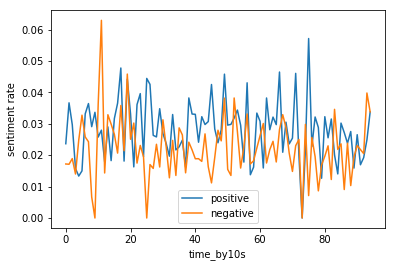

In [219]:
plt.plot(df_agg.index,df_agg['pos_words']/df_agg['num_toks']);
plt.plot(df_agg.index,df_agg['neg_words']/df_agg['num_toks']);
plt.xlabel('time_by10s')
plt.ylabel('sentiment rate')
plt.legend(['positive','negative']);

In [220]:
#one more aggregation
dfNew['time10b'] = round(dfNew['time']/30, 0)
#dfNew[1:40]

In [221]:
df_aggb = dfNew.groupby('time10b').aggregate('sum')[['pos_words','neg_words','num_toks']]
df_aggb.head()

pos_words  neg_words  num_toks
time10b                                
0.0             26         16       880
1.0             27         27      1459
2.0             47         51      1794
3.0             25         10       844
4.0             24         30       945

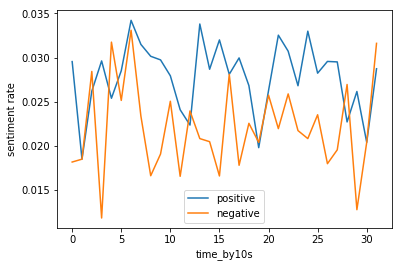

In [222]:
plt.plot(df_aggb.index,df_aggb['pos_words']/df_aggb['num_toks']);
plt.plot(df_aggb.index,df_aggb['neg_words']/df_aggb['num_toks']);
plt.xlabel('time_by10s')
plt.ylabel('sentiment rate')
plt.legend(['positive','negative']);

# playing with feature vectors 
--------------
- Can we use features to predict sentiment? 

In [223]:
import codecs #unicode compliance -- maybe not necessary in python 3?
import glob #wildcard filenames

In [224]:
from sklearn.feature_extraction.text import CountVectorizer

In [225]:
vect = CountVectorizer()

In [226]:
#let's look at all the words that occur at least once in the tweet data
vect.fit(dfNew['tweet'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [227]:
#7000 different "words" being used in 1067 tweets
len(vect.vocabulary_)

7341

In [228]:
dfNew.shape

(1067, 8)

In [229]:
#now that we've fit the vectorizer, let's transform the data to look at the features
X = vect.transform(dfNew['tweet'])
X

<1067x7341 sparse matrix of type '<class 'numpy.int64'>'
	with 37108 stored elements in Compressed Sparse Row format>

In [230]:
y = dfNew['prediction']

In [231]:
#call the function to hold out a test set
from sklearn.model_selection import train_test_split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)

In [233]:
X_train #960 tweets in our training set

<960x7341 sparse matrix of type '<class 'numpy.int64'>'
	with 33459 stored elements in Compressed Sparse Row format>

In [234]:
X_test #107 documents in our test set

<107x7341 sparse matrix of type '<class 'numpy.int64'>'
	with 3649 stored elements in Compressed Sparse Row format>

In [235]:
from sklearn.linear_model import LogisticRegression

In [236]:
lr = LogisticRegression()

In [237]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [238]:
lr.classes_ #dv

array(['negative', 'neutral', 'positive'], dtype=object)

In [239]:
lr.coef_ #coefficients

array([[ -1.06516251e-01,   0.00000000e+00,  -1.20055910e-01, ...,
         -8.69523981e-02,  -2.28256064e-02,  -2.28256064e-02],
       [  1.61801854e-01,   0.00000000e+00,  -1.97766387e-02, ...,
         -2.70039652e-01,   7.45897541e-07,   7.45897541e-07],
       [ -8.27411676e-02,   0.00000000e+00,   1.42261857e-01, ...,
          3.58379669e-01,   1.02399234e-02,   1.02399234e-02]])

In [240]:
#to get the top features, let's sort the coefficients 
lr.coef_[0:3].argsort()[::-1][:6]

array([[4116,  999, 6199, ..., 1056, 3720, 2600],
       [2600, 2311, 6759, ..., 5073, 1039, 6192],
       [3720, 3474, 3866, ..., 5734, 5589, 2311]])

In [241]:
#and to get their corresponding names... NEGATIVE 
[vect.get_feature_names()[i] for i in lr.coef_[0].argsort()[::-1][:6]]

['fear', 'sin', 'speaking', 'shirk', 'cave', 'enemies']

In [242]:
[vect.get_feature_names()[i] for i in lr.coef_[1].argsort()[::-1][:6]] #NEUTRAL

['there', 'believer', 'remember', 'bin', 'others', 'make']

In [243]:
[vect.get_feature_names()[i] for i in lr.coef_[2].argsort()[::-1][:6]] #POSITIVE

['good', 'love', 'benefit', 'protection', 'favorite', 'perfect']

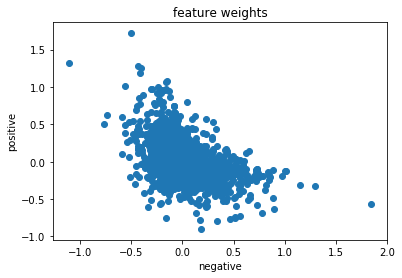

In [244]:
plt.scatter(lr.coef_[0],lr.coef_[2])
plt.xlabel(lr.classes_[0])
plt.ylabel(lr.classes_[2])
plt.title('feature weights'); #we can plot the differences... 

In [245]:
#we might also want to penalize the coefficients so that it doesn't overcount the effects
#of words that are not mentioned very often... so think will shrink coefficients to zero
lr_l1 = LogisticRegression(penalty='l1')

In [246]:
lr_l1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

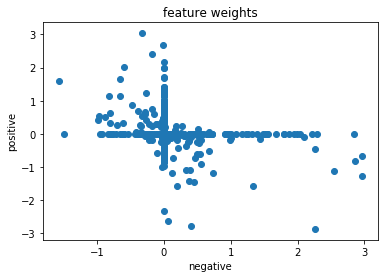

In [247]:
plt.scatter(lr_l1.coef_[0],lr_l1.coef_[2])
plt.xlabel(lr_l1.classes_[0])
plt.ylabel(lr_l1.classes_[2])
plt.title('feature weights');
#looks like pretty strong correlation between features and sentiment 

# Topics over time

In [248]:
#this constructs and inverted index from the columns (each word) of X back to the vocabulary
ivoc = {j:i for i,j in vect.vocabulary_.items()}

In [249]:
#let's use numpy to generate an array where we sum the total counts for each word (columns)
[ivoc[i] for i in np.array(X.sum(axis=0))[0].argsort()[::-1][:5]]

['the', 'you', 'to', 'of', 'is']

In [250]:
from sklearn.decomposition import LatentDirichletAllocation

In [251]:
lda = LatentDirichletAllocation(n_topics=10)

In [252]:
theta = lda.fit_transform(X)

/Users/shawnramirez/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [253]:
def show_topics(lda,ivoc):
    for k,topic in enumerate(lda.components_):
        print(k,[ivoc[i] for i in topic.argsort()[::-1][:7]])

In [254]:
show_topics(lda,ivoc)

0 ['torontooiler', 'abu_mariyah', 'abubakral_janab', 'kljbhkjhkugfcfxhfdxhfckjngasp', 'combination', 'purposes', 'universities']
1 ['min', 'stone', 'fell', 'piety', 'al', 'anhu', 'couch']
2 ['_axaa', 'bin', 'between', 'walking', 'yahya', 'secret', 'targets']
3 ['hand', 'al', 'family', 'persevere', '13', 'huge', 'gitmo']
4 ['potential', 'belong', 'fast', 'traveling', 'braking', 'iqama', 'destination']
5 ['repentance', 'wa', 'blackheads', 'pimples', 'blemishes', 'seed', 'correctmyfaults']
6 ['blocked', 'authentic', 'assuming', 'kick', 'sun', 'nasaa', 'declared']
7 ['co', 'http', 'https', 'marwantted', 'suhailassalafi', 'comedy', 'allƒÅh']
8 ['ibn', 'al_muhajiroun', 'mujaahid4life', 'ali', 'ya', 'the', 'immisterd']
9 ['the', 'to', 'you', 'of', 'is', 'in', 'allah']


In [255]:
lda_half = LatentDirichletAllocation(n_topics=5)# your code here
theta_half = lda_half.fit_transform(X)

lda_twice = LatentDirichletAllocation(n_topics=20)# your code here. This might take a few minutes to run.
theta_twice = lda_twice.fit_transform(X)

/Users/shawnramirez/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/shawnramirez/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [256]:
show_topics(lda_half,ivoc)

0 ['the', 'to', 'you', 'of', 'is', 'allah', 'in']
1 ['before', 'abdihalimsalad', 'lowkey', 'covenant', 'athan', 'iqama', 'knownjurhun']
2 ['al', 'the', 'of', 'and', 'rt', 'was', 'he']
3 ['co', 'http', 'https', 'persevere', 'family', 'ukhtidem', '13']
4 ['wa', 'ukhtidem', 'ŸäŸÜ', 'potential', 'min', 'ÿßŸÑŸÖ', 'affairs']


In [258]:
show_topics(lda_twice,ivoc)

0 ['example', 'ameerana_abudua', 'sallallahu', 'wasallam', 'swim', 'learning', 'alayhi']
1 ['ramadƒÅn', 'adhƒ´m', 'basis', 'fan', 'sharƒ´f', 'mubƒÅrak', 'fawzƒÅn']
2 ['bin', 'deed', 'tight', 'pleases', 'Ÿäÿ±', 'jkikwhsijwkshdiambzgusnwks', 'clothes']
3 ['ulwan', 'beloved', 'release', 'isra', 'ameen', 'our', 'at']
4 ['ismael', 'haroon', 'qiyamah', 'sanity', 'spread', 'khayr', 'ilm']
5 ['zulfiqaar', 'hit', 'iyyah', 'feesaabililah', 'talked', 'notes', 'my']
6 ['the', 'to', 'you', 'of', 'is', 'in', 'allah']
7 ['application', 'sytuc7wtbt', 'building', 'masjid', 'intelligence', 'baqiyyaaaaaaaah', 'connect']
8 ['marwantted', 'comedy', 'mrjaman_', 'sulayman', 'tawakkul', 'walking', 'targets']
9 ['13', 'regretful', '15', 'ÿßŸÑŸÑŸá', 'prisoner', 'family', 'ÿ≥ÿ®ÿ≠ÿßŸÜ']
10 ['honey', 'haldi', 'authentic', 'seed', 'various', 'ali', 'destined']
11 ['rip', 'torontooiler', 'abu_mariyah', 'abubakral_janab', 'fast', 'bosnia', 'stone']
12 ['milhan', 'haneef', 'abdulwadood', 'muddathir', 'ÿ®ÿ±ŸÉÿßÿ™Ÿá', '

In [296]:
#How many iterations?
lda_quick = LatentDirichletAllocation(n_topics=10,max_iter=2)
lda_quick.fit(X)
show_topics(lda_quick,ivoc)

/Users/shawnramirez/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


0 ['various', 'marwantted', 'the', 'mrjaman_', 'is', 'to', 'feminist']
1 ['the', 'kljbhkjhkugfcfxhfdxhfckjngasp', 'isa', 'ramadƒÅn', 'hit', 'romans', 'karƒ´m']
2 ['the', 'of', 'you', 'that', 'will', 'did', 'from']
3 ['the', 'co', 'of', 'http', 'ibn', 'https', 'ya']
4 ['suhailassalafi', 'to', 'born', 'potential', 'the', 'swim', 'learning']
5 ['wa', 'lana', 'innaka', 'silent', 'tight', 'mƒÅlik', 'ÿπŸÜŸá']
6 ['ÿßŸÑÿ®ÿßÿ∑ŸÑ', 'boy', 'pray', 'ÿ≥ÿ®ÿ≠ÿßŸÜ', 'salƒÅh', 'duhƒÅ', 'ad']
7 ['the', 'allah', 'in', 'has', 'of', 'you', 'your']
8 ['the', 'to', 'you', 'will', 'is', 'be', 'of']
9 ['the', 'to', 'you', 'of', 'is', 'allah', 'for']


In [261]:
#long run
lda_longrun = LatentDirichletAllocation(max_iter=100,evaluate_every=5,verbose=1)
theta_longrun = lda_longrun.fit_transform(X)

/Users/shawnramirez/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


iteration: 5, perplexity: 1547.6909
iteration: 10, perplexity: 1516.9255
iteration: 15, perplexity: 1512.3592
iteration: 20, perplexity: 1510.5589
iteration: 25, perplexity: 1509.4806
iteration: 30, perplexity: 1508.7733
iteration: 35, perplexity: 1508.2412
iteration: 40, perplexity: 1507.8876
iteration: 45, perplexity: 1507.5890
iteration: 50, perplexity: 1507.3592
iteration: 55, perplexity: 1507.1778
iteration: 60, perplexity: 1507.0306
iteration: 65, perplexity: 1506.9076
iteration: 70, perplexity: 1506.7760
iteration: 75, perplexity: 1506.6712
iteration: 80, perplexity: 1506.5812


In [262]:
show_topics(lda_longrun,ivoc)

0 ['ŸäŸÜ', 'ÿßŸÑŸÖ', 'uae', 'ÿßŸÑ', 'ÿßŸÑŸÑ', 'announced', 'covenant']
1 ['the', 'to', 'you', 'of', 'is', 'in', 'allah']
2 ['ummharith_', 'striving_ukht', 'sherj_', 'ibnarthur', 'humzmufasa', 'ameerana_abudua', 'potential']
3 ['13', 'regretful', 'sytuc7wtbt', 'application', '15', 'siyar', 'hit']
4 ['torontooiler', 'mujaahid4life', 'al', 'sarayah', 'struggles', 'repentance', 'allahumma']
5 ['wa', 'persevere', '10', 'ali', 'nasheed', 'complaining', 'sends']
6 ['suhailassalafi', 'born', 'uzbekistan', 'between', 'footy', 'destined', 'persia']
7 ['_axaa', 'blocked', 'sun', 'not', 'until', 'journey4jannah', 'mfreespeech']
8 ['marwantted', 'radi', 'basis', 'of', 'amoney718', 'prophets', 'al']
9 ['co', 'http', 'https', 'hands', 'by', 'swim', 'authentic']


In [362]:
#pick a topic we want to trace over time
salafi = 7

In [298]:
theta_longrun

array([[  5.52486226e-04,   9.95027543e-01,   5.52500832e-04, ...,
          5.52486587e-04,   5.52491305e-04,   5.52499998e-04],
       [  8.62069012e-04,   8.78547819e-01,   8.62069004e-04, ...,
          8.62069010e-04,   1.14555621e-01,   8.62069007e-04],
       [  2.50000012e-03,   7.39837190e-01,   2.40162456e-01, ...,
          2.50000011e-03,   2.50009247e-03,   2.50024734e-03],
       ..., 
       [  2.00000004e-02,   4.19982590e-01,   2.00000003e-02, ...,
          2.00000004e-02,   4.20006795e-01,   2.00000003e-02],
       [  5.00000003e-02,   5.00007599e-02,   5.49999238e-01, ...,
          5.00000003e-02,   5.00000002e-02,   5.00000003e-02],
       [  2.50000001e-02,   2.50014216e-02,   2.50000001e-02, ...,
          2.50000001e-02,   2.50000001e-02,   2.50000001e-02]])

In [351]:
theta_longrun.shape

(1067, 10)

In [363]:
theta_longrun[:,salafi].max()

0.77499218229561739

In [349]:
top_docs = theta_longrun[:,salafi].argsort()[::-1][:3]

In [350]:
top_docs

array([672, 554, 983])

In [364]:
dfNew = dfNew.assign(sal_topic=theta_longrun[:,salafi])

In [365]:
dfNew = dfNew.assign(arabic_topic=theta_longrun[:,0])

In [366]:
dfNew.head()

tweet  pos_words  neg_words  \
0  _UmmWaqqas\tThe test in our struggles is our a...          8          3   
2  There was a sister who wanted to make Hijrah &...          1          2   
4   (Tirmidhi)Lool at those articles. The crap jo...          0          3   
6                             http://t.co/PPqSvThW9I          0          0   
8  I love reading articlesPretty much that articl...          2          0   

  prediction  num_toks  time  time10a  time10b  sal_topic  arabic_topic  
0   positive       215   0.0      0.0      0.0   0.000552      0.000552  
2   negative       144   1.0      0.0      0.0   0.000862      0.000862  
4   negative        49   2.0      0.0      0.0   0.002500      0.002500  
6    neutral         1   3.0      0.0      0.0   0.025000      0.274970  
8   positive        48   4.0      0.0      0.0   0.002381      0.002381

In [354]:
dfNew.shape

(1067, 9)

In [346]:
print(dfNew['tweet'][1050:])

1856    Lol @_Only1M & @MannWaSalwah use to say "The D...
1858    Its sad we have 2 sides though tbhLol we just ...
1860    The strength of Muslim twitter i tell ya.Chang...
1862    Lol Sorry@ana_mrida Lol i fell of the couch re...
1864    Lol i don't trust eggs man, you shouldve told ...
1866    I blocked the person without viewing the pictu...
1868      @BananaAndRiceP2 @MannWaSalwahShe stated me ...
1870    Prestige üòåüòåüòåüòåüòåüòåüòåüòåüòåRT @BananaAndRiceP2: My stat...
1872    - Ibn Qay‚Ä¶No wisdom behind recklessness, hones...
1873    #StopTwitterUkhtis2014Vine is comedy..LOOOOOOO...
1875    SubhanAllah Allah is amazingRasululilah SAW sa...
1877    Man opportunities we are givenWhilst sipping Z...
1879                                       Whilst Raining
1880                               Qiyyamul Layl/Tahajjud
1881                             After Athan before Iqama
1882                                            Traveling
1883                                  Befor

In [333]:
print(dfNew['tweet'].loc[1883])

Before braking fast


In [ ]:
print(dfNew['tweet'].loc[672])

In [336]:
print(dfNew['tweet'].loc[554])

"O you who believe! Why do you say that which you do not do?"


In [ ]:
print(dfNew['tweet'].loc[983])

In [ ]:
#Look at the top docs in that topic
for filenum in top_docs:
    print(dfNew['tweet'].loc[filenum])
#    with open (dfNew['tweet'][filenum]) as fin:
#        print(dfNew['tweet'][filenum],fin.readlines())

In [279]:
#Topic strength over time
plt.scatter([dfNew['time'][t]] for t in time],theta_longrun[:,war_topic],alpha=0.5);
plt.ylabel('strength of topic')
plt.xlabel('time');

SyntaxError: invalid syntax (<ipython-input-279-75dfd1ebec9f>, line 2)

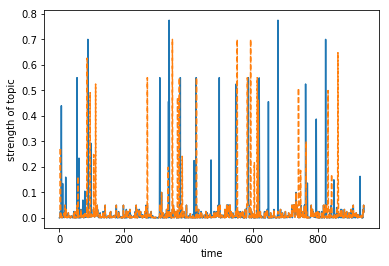

In [368]:
plt.plot(dfNew['time'],dfNew['sal_topic'])
plt.plot(dfNew['time'],dfNew['arabic_topic'],linestyle='--')
plt.ylabel('strength of topic')
plt.xlabel('time');

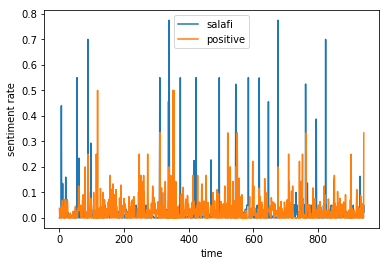

In [374]:
plt.plot(dfNew['time'],dfNew['sal_topic']);
plt.plot(dfNew['time'],dfNew['pos_words']/dfNew['num_toks']);
plt.xlabel('time')
plt.ylabel('sentiment rate')
plt.legend(['salafi','positive']);

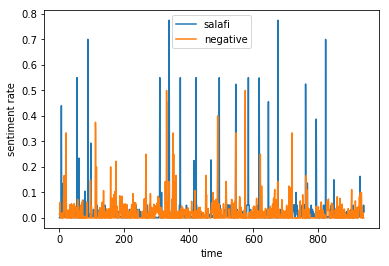

In [375]:
plt.plot(dfNew['time'],dfNew['sal_topic']);
plt.plot(dfNew['time'],dfNew['neg_words']/dfNew['num_toks']);
plt.xlabel('time')
plt.ylabel('sentiment rate')
plt.legend(['salafi','negative']);

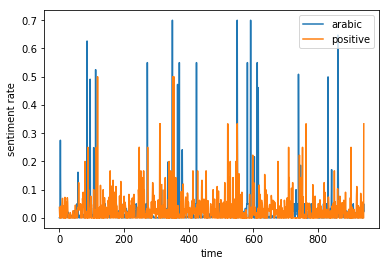

In [379]:
plt.plot(dfNew['time'],dfNew['arabic_topic']);
plt.plot(dfNew['time'],dfNew['pos_words']/dfNew['num_toks']);
plt.xlabel('time')
plt.ylabel('sentiment rate')
plt.legend(['arabic','positive']);

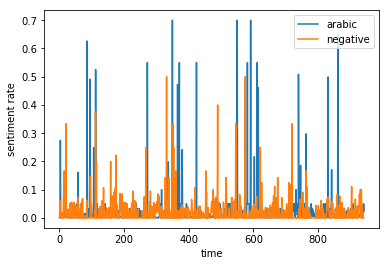

In [378]:
plt.plot(dfNew['time'],dfNew['arabic_topic']);
plt.plot(dfNew['time'],dfNew['neg_words']/dfNew['num_toks']);
plt.xlabel('time')
plt.ylabel('sentiment rate')
plt.legend(['arabic','negative']);

In [382]:
import numpy as np

In [388]:
np.corrcoef(dfNew['arabic_topic'], dfNew['sal_topic'])

array([[ 1.        ,  0.06771917],
       [ 0.06771917,  1.        ]])

In [398]:
dfNew = dfNew.assign(negsem = dfNew['neg_words']/dfNew['num_toks'])

In [400]:
dfNew = dfNew.assign(possem = dfNew['pos_words']/dfNew['num_toks'])

In [401]:
dfNew.head()

tweet  pos_words  neg_words  \
0  _UmmWaqqas\tThe test in our struggles is our a...          8          3   
2  There was a sister who wanted to make Hijrah &...          1          2   
4   (Tirmidhi)Lool at those articles. The crap jo...          0          3   
6                             http://t.co/PPqSvThW9I          0          0   
8  I love reading articlesPretty much that articl...          2          0   

  prediction  num_toks  time  time10a  time10b  sal_topic  arabic_topic  \
0   positive       215   0.0      0.0      0.0   0.000552      0.000552   
2   negative       144   1.0      0.0      0.0   0.000862      0.000862   
4   negative        49   2.0      0.0      0.0   0.002500      0.002500   
6    neutral         1   3.0      0.0      0.0   0.025000      0.274970   
8   positive        48   4.0      0.0      0.0   0.002381      0.002381   

     negsem    possem  
0  0.013953  0.037209  
2  0.013889  0.006944  
4  0.061224  0.000000  
6  0.000000  0.000000  
8  0.000000  0.041667

In [408]:
#It would be most helpful to know which of the topic modeling choices are picking up on real topics. 
#1. to figure that out the fastest, I need code that runs a choice over parameters
#2. to calculate the probability distribution over topics
#3. then to pick out the documents that are most highly correlated with each topic to verify that the topic is meaningful
#4. then we can look at them over time.

# I am having trouble with step 3. I don't understand how the transformation works to pick out the documents. 


array([[  1.,  nan],
       [ nan,  nan]])